# Time series

In [2]:
from __future__ import division
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np
pd.options.display.max_rows = 12
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 4))

In [2]:
%matplotlib inline

## Date and Time Data Types and Tools

In [3]:
from datetime import datetime
now = datetime.now()
now

datetime.datetime(2017, 7, 21, 9, 52, 23, 233334)

In [4]:
now.year, now.month, now.day

(2017, 7, 21)

In [5]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(926, 56700)

In [6]:
delta.days

926

In [8]:
delta.seconds

56700

In [9]:
delta.microseconds

0

In [10]:
from datetime import timedelta
start = datetime(2011, 1, 7)
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [11]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

### Converting between string and datetime

In [12]:
stamp = datetime(2011, 1, 3)

In [13]:
str(stamp)

'2011-01-03 00:00:00'

In [14]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [15]:
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [16]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [17]:
from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [18]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [19]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [20]:
datestrs

['7/6/2011', '8/6/2011']

In [21]:
pd.to_datetime(datestrs)
# note: output changed (no '00:00:00' anymore)

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)

In [22]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06', '2011-08-06', 'NaT'], dtype='datetime64[ns]', freq=None)

In [23]:
idx[2]

NaT

In [24]:
pd.isnull(idx)

array([False, False,  True], dtype=bool)

## Time Series Basics

In [25]:
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7),
         datetime(2011, 1, 8), datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = Series(np.random.randn(6), index=dates)
ts

2011-01-02    0.138711
2011-01-05   -0.209602
2011-01-07   -1.132586
2011-01-08    0.484877
2011-01-10    0.875096
2011-01-12    0.311123
dtype: float64

In [26]:
type(ts)
# note: output changed to "pandas.core.series.Series"

pandas.core.series.Series

In [27]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [29]:
ts[::2]

2011-01-02    0.138711
2011-01-07   -1.132586
2011-01-10    0.875096
dtype: float64

In [28]:
ts + ts[::2]

2011-01-02    0.277423
2011-01-05         NaN
2011-01-07   -2.265173
2011-01-08         NaN
2011-01-10    1.750193
2011-01-12         NaN
dtype: float64

In [30]:
ts.index.dtype
# note: output changed from dtype('datetime64[ns]') to dtype('<M8[ns]')

dtype('<M8[ns]')

In [31]:
stamp = ts.index[0]
stamp
# note: output changed from <Timestamp: 2011-01-02 00:00:00> to Timestamp('2011-01-02 00:00:00')

Timestamp('2011-01-02 00:00:00')

### Indexing, selection, subsetting

In [32]:
stamp = ts.index[2]
ts[stamp]

-1.1325864318879839

In [33]:
ts['1/10/2011']

0.87509646690817178

In [34]:
ts['20110110']

0.87509646690817178

In [35]:
longer_ts = Series(np.random.randn(1000),
                   index=pd.date_range('1/1/2000', periods=1000))
longer_ts

2000-01-01    0.887906
2000-01-02   -0.908946
2000-01-03    0.815108
2000-01-04    0.381113
2000-01-05    0.990795
2000-01-06    2.104358
                ...   
2002-09-21   -0.884798
2002-09-22   -0.094259
2002-09-23    0.495302
2002-09-24    0.053999
2002-09-25    2.013575
2002-09-26   -0.626438
Freq: D, Length: 1000, dtype: float64

In [36]:
longer_ts['2001']

2001-01-01    0.834522
2001-01-02   -0.051751
2001-01-03    0.665116
2001-01-04    1.127259
2001-01-05   -0.921126
2001-01-06    1.369256
                ...   
2001-12-26    0.434922
2001-12-27    1.294941
2001-12-28   -0.005281
2001-12-29    1.419297
2001-12-30   -1.109415
2001-12-31    1.209502
Freq: D, Length: 365, dtype: float64

In [37]:
longer_ts['2001-05']

2001-05-01   -0.354806
2001-05-02   -0.496567
2001-05-03   -0.712207
2001-05-04   -1.445084
2001-05-05    0.551901
2001-05-06   -2.503282
                ...   
2001-05-26    0.798408
2001-05-27    0.840252
2001-05-28   -2.589574
2001-05-29    2.101481
2001-05-30    0.103940
2001-05-31   -1.043484
Freq: D, Length: 31, dtype: float64

In [38]:
ts[datetime(2011, 1, 7):]

2011-01-07   -1.132586
2011-01-08    0.484877
2011-01-10    0.875096
2011-01-12    0.311123
dtype: float64

In [39]:
ts

2011-01-02    0.138711
2011-01-05   -0.209602
2011-01-07   -1.132586
2011-01-08    0.484877
2011-01-10    0.875096
2011-01-12    0.311123
dtype: float64

In [40]:
ts['1/6/2011':'1/11/2011']

2011-01-07   -1.132586
2011-01-08    0.484877
2011-01-10    0.875096
dtype: float64

In [41]:
ts.truncate(after='1/9/2011')

2011-01-02    0.138711
2011-01-05   -0.209602
2011-01-07   -1.132586
2011-01-08    0.484877
dtype: float64

In [42]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = DataFrame(np.random.randn(100, 4),
                    index=dates,
                    columns=['Colorado', 'Texas', 'New York', 'Ohio'])
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,1.639499,-1.330136,0.903232,0.818163
2001-05-09,0.422963,-0.820887,0.586583,-1.192831
2001-05-16,1.078743,0.275675,-0.611806,-0.507920
2001-05-23,-0.723635,0.843172,1.845217,-0.062787
2001-05-30,0.813972,0.190286,-0.112155,-0.846254


### Time series with duplicate indices

In [43]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000',
                          '1/3/2000'])
dup_ts = Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [44]:
dup_ts.index.is_unique

False

In [45]:
dup_ts['1/3/2000']  # not duplicated

4

In [46]:
dup_ts['1/2/2000']  # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [47]:
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int64

In [48]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## Date ranges, Frequencies, and Shifting

In [51]:
ts

2011-01-02    0.138711
2011-01-05   -0.209602
2011-01-07   -1.132586
2011-01-08    0.484877
2011-01-10    0.875096
2011-01-12    0.311123
dtype: float64

In [55]:
ts.resample('D').mean()

2011-01-02    0.138711
2011-01-03         NaN
2011-01-04         NaN
2011-01-05   -0.209602
2011-01-06         NaN
2011-01-07   -1.132586
2011-01-08    0.484877
2011-01-09         NaN
2011-01-10    0.875096
2011-01-11         NaN
2011-01-12    0.311123
Freq: D, dtype: float64

### Generating date ranges

In [56]:
index = pd.date_range('4/1/2012', '6/1/2012')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [57]:
pd.date_range(start='4/1/2012', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [58]:
pd.date_range(end='6/1/2012', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [59]:
pd.date_range('1/1/2000', '12/1/2000', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [60]:
pd.date_range('5/2/2012 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [61]:
pd.date_range('5/2/2012 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### Frequencies and Date Offsets

In [62]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
hour

<Hour>

In [63]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [64]:
pd.date_range('1/1/2000', '1/3/2000 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [65]:
Hour(2) + Minute(30)

<150 * Minutes>

In [66]:
pd.date_range('1/1/2000', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

#### Week of month dates

In [67]:
rng = pd.date_range('1/1/2012', '9/1/2012', freq='WOM-3FRI')
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### Shifting (leading and lagging) data

In [68]:
ts = Series(np.random.randn(4),
            index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31    1.357562
2000-02-29   -0.166114
2000-03-31   -0.205106
2000-04-30   -0.322473
Freq: M, dtype: float64

In [69]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    1.357562
2000-04-30   -0.166114
Freq: M, dtype: float64

In [70]:
ts.shift(-2)

2000-01-31   -0.205106
2000-02-29   -0.322473
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [71]:
ts.shift(2, freq='M')

2000-03-31    1.357562
2000-04-30   -0.166114
2000-05-31   -0.205106
2000-06-30   -0.322473
Freq: M, dtype: float64

In [72]:
ts.shift(3, freq='D')

2000-02-03    1.357562
2000-03-03   -0.166114
2000-04-03   -0.205106
2000-05-03   -0.322473
dtype: float64

In [73]:
ts.shift(1, freq='3D')

2000-02-03    1.357562
2000-03-03   -0.166114
2000-04-03   -0.205106
2000-05-03   -0.322473
dtype: float64

In [74]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00    1.357562
2000-02-29 01:30:00   -0.166114
2000-03-31 01:30:00   -0.205106
2000-04-30 01:30:00   -0.322473
Freq: M, dtype: float64

#### Shifting dates with offsets

In [75]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [76]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [77]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [78]:
offset = MonthEnd()
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [79]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [80]:
ts = Series(np.random.randn(20),
            index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.088753
2000-02-29   -0.509129
2000-03-31    0.105285
dtype: float64

In [83]:
ts.resample('M').mean()

2000-01-31   -0.088753
2000-02-29   -0.509129
2000-03-31    0.105285
Freq: M, dtype: float64

## Time Zone Handling

In [84]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [85]:
tz = pytz.timezone('US/Eastern')
tz

<DstTzInfo 'US/Eastern' LMT-1 day, 19:04:00 STD>

### Localization and Conversion

In [87]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00   -1.591145
2012-03-10 09:30:00   -0.858491
2012-03-11 09:30:00    0.756162
2012-03-12 09:30:00   -0.380169
2012-03-13 09:30:00   -0.363288
2012-03-14 09:30:00   -0.868831
Freq: D, dtype: float64

In [88]:
print(ts.index.tz)

None


In [89]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [90]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00   -1.591145
2012-03-10 09:30:00+00:00   -0.858491
2012-03-11 09:30:00+00:00    0.756162
2012-03-12 09:30:00+00:00   -0.380169
2012-03-13 09:30:00+00:00   -0.363288
2012-03-14 09:30:00+00:00   -0.868831
Freq: D, dtype: float64

In [91]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [92]:
ts_utc.tz_convert('US/Eastern')

2012-03-09 04:30:00-05:00   -1.591145
2012-03-10 04:30:00-05:00   -0.858491
2012-03-11 05:30:00-04:00    0.756162
2012-03-12 05:30:00-04:00   -0.380169
2012-03-13 05:30:00-04:00   -0.363288
2012-03-14 05:30:00-04:00   -0.868831
Freq: D, dtype: float64

In [93]:
ts_eastern = ts.tz_localize('US/Eastern')
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00   -1.591145
2012-03-10 14:30:00+00:00   -0.858491
2012-03-11 13:30:00+00:00    0.756162
2012-03-12 13:30:00+00:00   -0.380169
2012-03-13 13:30:00+00:00   -0.363288
2012-03-14 13:30:00+00:00   -0.868831
Freq: D, dtype: float64

In [94]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -1.591145
2012-03-10 15:30:00+01:00   -0.858491
2012-03-11 14:30:00+01:00    0.756162
2012-03-12 14:30:00+01:00   -0.380169
2012-03-13 14:30:00+01:00   -0.363288
2012-03-14 14:30:00+01:00   -0.868831
Freq: D, dtype: float64

In [95]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

### Operations with time zone-aware Timestamp objects

In [96]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('US/Eastern')

Timestamp('2011-03-11 23:00:00-0500', tz='US/Eastern')

In [97]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [98]:
stamp_utc.value

1299902400000000000

In [99]:
stamp_utc.tz_convert('US/Eastern').value

1299902400000000000

In [100]:
# 30 minutes before DST transition
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [101]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [102]:
# 90 minutes before DST transition
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [103]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### Operations between different time zones

In [104]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00   -1.872623
2012-03-08 09:30:00   -0.356159
2012-03-09 09:30:00    0.953723
2012-03-12 09:30:00   -0.044776
2012-03-13 09:30:00   -0.954264
2012-03-14 09:30:00    0.891554
2012-03-15 09:30:00   -0.349687
2012-03-16 09:30:00   -0.285557
2012-03-19 09:30:00    0.800066
2012-03-20 09:30:00   -2.016401
Freq: B, dtype: float64

In [105]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

## Periods and Period Arithmetic

In [106]:
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In [107]:
p + 5

Period('2012', 'A-DEC')

In [108]:
p - 2

Period('2005', 'A-DEC')

In [109]:
pd.Period('2014', freq='A-DEC') - p

7

In [110]:
rng = pd.period_range('1/1/2000', '6/30/2000', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [111]:
Series(np.random.randn(6), index=rng)

2000-01   -1.335641
2000-02    0.042216
2000-03    0.791462
2000-04   -0.140591
2000-05    1.381041
2000-06    0.772737
Freq: M, dtype: float64

In [112]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### Period Frequency Conversion

In [121]:
p = pd.Period('2007', freq='A-NOV')
p.asfreq('M', how='start')

Period('2006-12', 'M')

In [122]:
p.asfreq('M', how='end')

Period('2007-11', 'M')

In [123]:
p = pd.Period('2007', freq='A-JUN')
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [124]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

In [125]:
p = pd.Period('Aug-2007', 'M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [126]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2006    0.308043
2007    1.002262
2008    1.324208
2009    0.547587
Freq: A-DEC, dtype: float64

In [127]:
ts.asfreq('M', how='start')

2006-01    0.308043
2007-01    1.002262
2008-01    1.324208
2009-01    0.547587
Freq: M, dtype: float64

In [128]:
ts.asfreq('B', how='end')

2006-12-29    0.308043
2007-12-31    1.002262
2008-12-31    1.324208
2009-12-31    0.547587
Freq: B, dtype: float64

### Quarterly period frequencies

In [129]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [130]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [131]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [132]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
p4pm

Period('2012-01-30 16:00', 'T')

In [133]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [134]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [135]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

### Converting Timestamps to Periods (and back)

In [136]:
rng = pd.date_range('1/1/2000', periods=3, freq='M')
ts = Series(randn(3), index=rng)
pts = ts.to_period()
ts

2000-01-31   -0.007525
2000-02-29   -0.147268
2000-03-31   -0.049990
Freq: M, dtype: float64

In [137]:
pts

2000-01   -0.007525
2000-02   -0.147268
2000-03   -0.049990
Freq: M, dtype: float64

In [138]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = Series(randn(6), index=rng)
ts2.to_period('M')

2000-01   -0.597179
2000-01    0.155616
2000-01   -0.594077
2000-02    0.097474
2000-02   -1.147054
2000-02    0.811740
Freq: M, dtype: float64

In [139]:
pts = ts.to_period()
pts

2000-01   -0.007525
2000-02   -0.147268
2000-03   -0.049990
Freq: M, dtype: float64

In [140]:
pts.to_timestamp(how='end')

2000-01-31   -0.007525
2000-02-29   -0.147268
2000-03-31   -0.049990
Freq: M, dtype: float64

### Creating a PeriodIndex from arrays

In [141]:
data = pd.read_csv('ch08/macrodata.csv')
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
5      1960.0
        ...  
197    2008.0
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [142]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
5      2.0
      ... 
197    2.0
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [143]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [144]:
data.index = index
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
1960Q2    0.14
          ... 
2008Q2    8.53
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

## Resampling and Frequency Conversion

In [146]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = Series(randn(len(rng)), index=rng)
ts.resample('M').mean()

2000-01-31    0.222519
2000-02-29    0.183633
2000-03-31   -0.483410
2000-04-30   -0.126188
Freq: M, dtype: float64

In [147]:
ts.resample('M', kind='period').mean()

2000-01    0.222519
2000-02    0.183633
2000-03   -0.483410
2000-04   -0.126188
Freq: M, dtype: float64

### Downsampling

In [3]:
rng = pd.date_range('1/1/2000', periods=12, freq='T')
ts = Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [5]:
ts.resample('5min').sum()
# note: output changed (as the default changed from closed='right', label='right' to closed='left', label='left'

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [9]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [10]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

In [11]:
ts.resample('5min', closed='right', label='right', loffset='-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int64

#### Open-High-Low-Close (OHLC) resampling

In [13]:
ts.resample('5min').ohlc()
# note: output changed because of changed defaults

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


#### Resampling with GroupBy

In [17]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = Series(np.arange(100), index=rng)
ts

2000-01-01     0
2000-01-02     1
2000-01-03     2
2000-01-04     3
2000-01-05     4
2000-01-06     5
              ..
2000-04-04    94
2000-04-05    95
2000-04-06    96
2000-04-07    97
2000-04-08    98
2000-04-09    99
Freq: D, Length: 100, dtype: int64

In [18]:
ts.groupby(lambda x: x.month).mean()

1    15
2    45
3    75
4    95
dtype: int64

In [19]:
ts.groupby(lambda x: x.weekday).mean()

0    47.5
1    48.5
2    49.5
3    50.5
4    51.5
5    49.0
6    50.0
dtype: float64

### Upsampling and interpolation

In [20]:
frame = DataFrame(np.random.randn(2, 4),
                  index=pd.date_range('1/1/2000', periods=2, freq='W-WED'),
                  columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,0.867796,-0.499307,-0.935611,-0.437149
2000-01-12,-1.789005,-1.061434,-1.299187,0.342803


In [21]:
df_daily = frame.resample('D')
df_daily

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

In [24]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,0.867796,-0.499307,-0.935611,-0.437149
2000-01-06,0.867796,-0.499307,-0.935611,-0.437149
2000-01-07,0.867796,-0.499307,-0.935611,-0.437149
2000-01-08,0.867796,-0.499307,-0.935611,-0.437149
2000-01-09,0.867796,-0.499307,-0.935611,-0.437149
2000-01-10,0.867796,-0.499307,-0.935611,-0.437149
2000-01-11,0.867796,-0.499307,-0.935611,-0.437149
2000-01-12,-1.789005,-1.061434,-1.299187,0.342803


In [25]:
frame.resample('D', limit=2).ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,0.867796,-0.499307,-0.935611,-0.437149
2000-01-06,0.867796,-0.499307,-0.935611,-0.437149
2000-01-07,0.867796,-0.499307,-0.935611,-0.437149
2000-01-08,0.867796,-0.499307,-0.935611,-0.437149
2000-01-09,0.867796,-0.499307,-0.935611,-0.437149
2000-01-10,0.867796,-0.499307,-0.935611,-0.437149
2000-01-11,0.867796,-0.499307,-0.935611,-0.437149
2000-01-12,-1.789005,-1.061434,-1.299187,0.342803


In [26]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,0.867796,-0.499307,-0.935611,-0.437149
2000-01-13,-1.789005,-1.061434,-1.299187,0.342803


### Resampling with periods

In [27]:
frame = DataFrame(np.random.randn(24, 4),
                  index=pd.period_range('1-2000', '12-2001', freq='M'),
                  columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,1.231182,0.248770,-0.263041,-0.648262
2000-02,0.323927,0.794054,1.601901,-0.729153
2000-03,1.629696,0.825364,0.131630,1.967688
2000-04,0.212061,1.098770,0.927374,-0.641398
2000-05,0.947589,0.343389,1.163559,0.477004


In [29]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.539224,0.349394,0.308819,0.310635
2001,-0.001796,0.027049,-0.304179,0.223240


In [33]:
# Q-DEC: Quarterly, year ending in December
annual_frame.resample('Q-DEC', convention='start').ffill()
# note: output changed, default value changed from convention='end' to convention='start' + 'start' changed to span-like
# also the following cells

,Colorado,Texas,New York,Ohio
2000Q1,0.539224,0.349394,0.308819,0.310635
2000Q2,0.539224,0.349394,0.308819,0.310635
2000Q3,0.539224,0.349394,0.308819,0.310635
2000Q4,0.539224,0.349394,0.308819,0.310635
2001Q1,-0.001796,0.027049,-0.304179,0.223240
2001Q2,-0.001796,0.027049,-0.304179,0.223240
2001Q3,-0.001796,0.027049,-0.304179,0.223240
2001Q4,-0.001796,0.027049,-0.304179,0.223240


In [34]:
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.539224,0.349394,0.308819,0.310635
2001Q1,0.539224,0.349394,0.308819,0.310635
2001Q2,0.539224,0.349394,0.308819,0.310635
2001Q3,0.539224,0.349394,0.308819,0.310635
2001Q4,-0.001796,0.027049,-0.304179,0.223240


In [35]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.539224,0.349394,0.308819,0.310635
2001Q1,0.539224,0.349394,0.308819,0.310635
2001Q2,0.539224,0.349394,0.308819,0.310635
2001Q3,0.539224,0.349394,0.308819,0.310635
2001Q4,-0.001796,0.027049,-0.304179,0.223240
2002Q1,-0.001796,0.027049,-0.304179,0.223240
2002Q2,-0.001796,0.027049,-0.304179,0.223240
2002Q3,-0.001796,0.027049,-0.304179,0.223240


## Time series plotting

In [46]:
close_px_all = pd.read_csv('ch09/stock_px.csv', parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2292 entries, 2003-01-02 to 2011-10-14
Freq: B
Data columns (total 3 columns):
AAPL    2292 non-null float64
MSFT    2292 non-null float64
XOM     2292 non-null float64
dtypes: float64(3)
memory usage: 71.6 KB


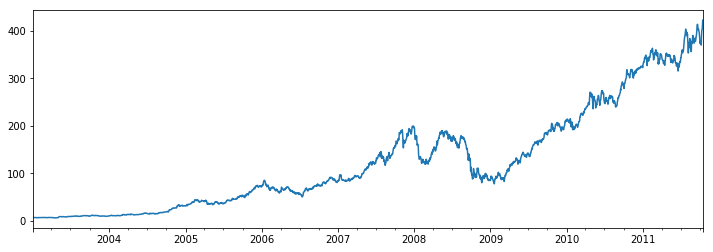

In [47]:
close_px['AAPL'].plot()
plt.show()

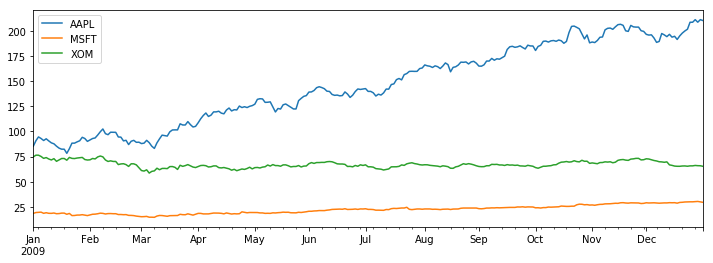

In [48]:
close_px.loc['2009'].plot()
plt.show()

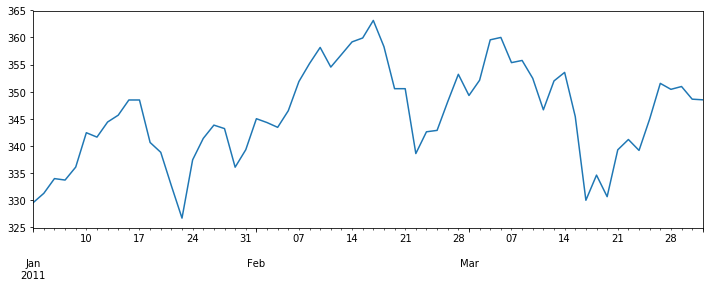

In [49]:
close_px['AAPL'].loc['01-2011':'03-2011'].plot()
plt.show()

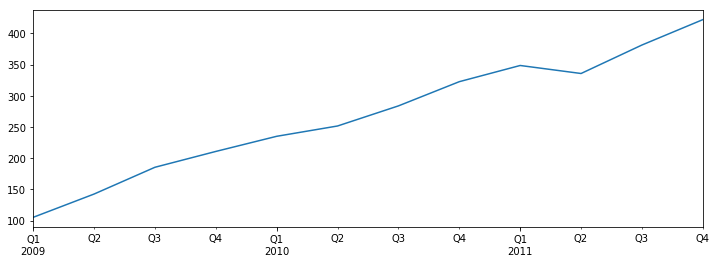

In [50]:
appl_q = close_px['AAPL'].resample('Q-DEC').ffill()
appl_q.loc['2009':].plot()
plt.show()

## Moving window functions

In [78]:
close_px = close_px.asfreq('B').fillna(method='ffill')

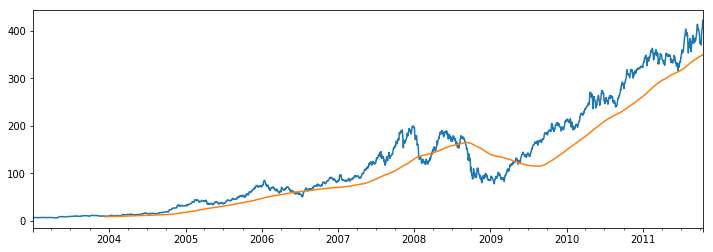

In [79]:
close_px.AAPL.plot()
close_px.AAPL.rolling(window=250,center=False).mean().plot()
plt.show()

In [82]:
appl_std250 = close_px.AAPL.rolling(window = 250, min_periods=10, center = False).std()
appl_std250[5:15]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
2003-01-20    0.132011
2003-01-21    0.149286
2003-01-22    0.169008
Freq: B, Name: AAPL, dtype: float64

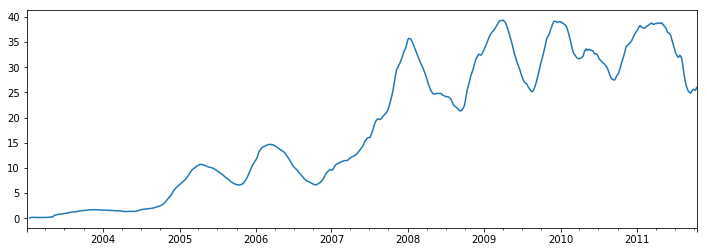

In [83]:
appl_std250.plot()
plt.show()

In [84]:
# Define expanding mean in terms of rolling_mean
expanding_mean = lambda x: rolling_mean(x, len(x), min_periods=1)

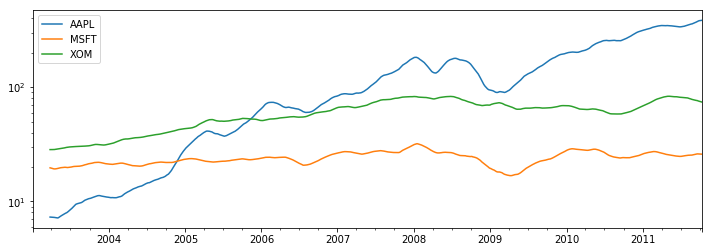

In [85]:
close_px.rolling(window = 60, center = False).mean().plot(logy=True)
plt.show()

In [86]:
plt.close('all')

### Exponentially-weighted functions

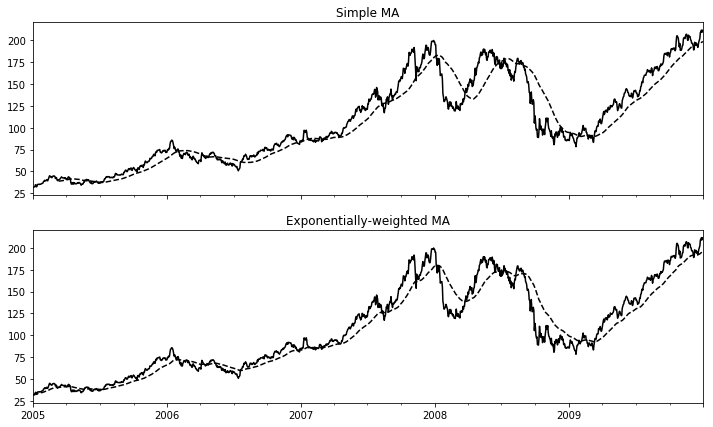

In [93]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True,
                         figsize=(12, 7))

aapl_px = close_px.AAPL['2005':'2009']

ma60 = aapl_px.rolling(window = 60, min_periods=50).mean()
ewma60 = aapl_px.ewm(span=60).mean()

aapl_px.plot(style='k-', ax=axes[0])
ma60.plot(style='k--', ax=axes[0])
aapl_px.plot(style='k-', ax=axes[1])
ewma60.plot(style='k--', ax=axes[1])
axes[0].set_title('Simple MA')
axes[1].set_title('Exponentially-weighted MA')
plt.show()

### Binary moving window functions

In [94]:
close_px
spx_px = close_px_all['SPX']

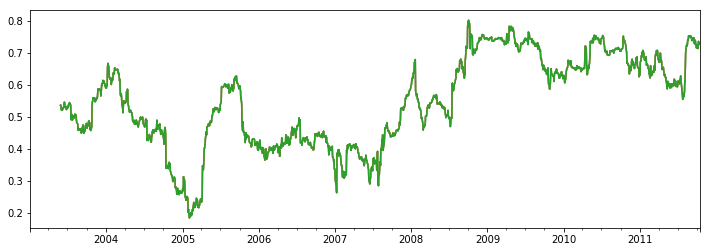

In [99]:
spx_rets = spx_px / spx_px.shift(1) - 1
returns = close_px.pct_change()
corr = returns.AAPL.rolling(window = 125, min_periods=100).corr(spx_rets)
corr.plot()
plt.show()

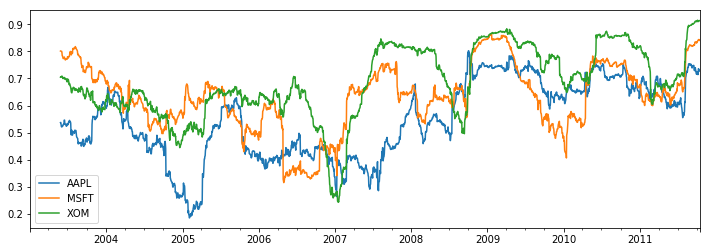

In [100]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()
plt.show()

### User-defined moving window functions

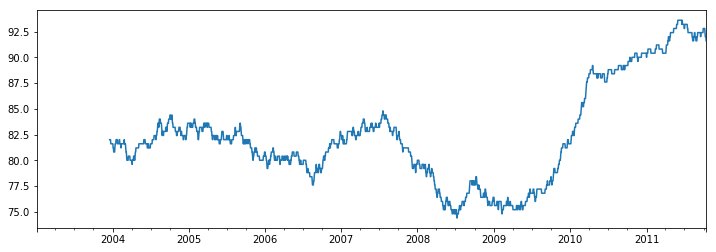

In [102]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(window = 250).apply(score_at_2percent)
result.plot()
plt.show()

## Performance and Memory Usage Notes

In [103]:
rng = pd.date_range('1/1/2000', periods=10000000, freq='10ms')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01 00:00:00.000   -1.393551
2000-01-01 00:00:00.010    1.206837
2000-01-01 00:00:00.020   -0.418432
2000-01-01 00:00:00.030   -0.221485
2000-01-01 00:00:00.040    0.425273
2000-01-01 00:00:00.050   -0.222041
                             ...   
2000-01-02 03:46:39.940    1.610022
2000-01-02 03:46:39.950   -0.421258
2000-01-02 03:46:39.960    1.669606
2000-01-02 03:46:39.970    0.148243
2000-01-02 03:46:39.980   -0.991476
2000-01-02 03:46:39.990    0.685212
Freq: 10L, Length: 10000000, dtype: float64

In [107]:
ts.resample('15min').ohlc().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11112 entries, 2000-01-01 00:00:00 to 2000-04-25 17:45:00
Freq: 15T
Data columns (total 4 columns):
open     11112 non-null float64
high     11112 non-null float64
low      11112 non-null float64
close    11112 non-null float64
dtypes: float64(4)
memory usage: 434.1 KB


In [108]:
%timeit ts.resample('15min').ohlc()

10 loops, best of 3: 88.4 ms per loop


In [109]:
rng = pd.date_range('1/1/2000', periods=10000000, freq='1s')
ts = Series(np.random.randn(len(rng)), index=rng)
%timeit ts.resample('15s').ohlc()

10 loops, best of 3: 104 ms per loop
